## Applied Machine Leraning
### Name : Nikhitha Jetling
### Z Id : Z1924282

# 1.

In [ ]:
%matplotlib inline
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data_set = pd.read_csv("healthcare-dataset-stroke-data.csv")
target_data = pd.DataFrame(data_set['stroke']) 
input_data = data_set.drop(['stroke'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Encoding nominal and ordinal features
encoded_df = pd.get_dummies(input_data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
bmi_column = encoded_df.bmi
# Dealing with missing values
bmi_feature = pd.DataFrame(bmi_column.fillna(np.mean(bmi_column)))
bmi_feature = bmi_feature['bmi'].round(decimals = 1)
encoded_df = encoded_df.drop(['bmi'], axis=1)
encoded_df.insert(5,'bmi',bmi_feature)
encoded_df.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.9,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
# Training a decision tree

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

X = encoded_df

X_train, X_test, y_train, y_test = train_test_split(X,target_data,
                                                    stratify=target_data,
                                                    random_state=0)
dt = DecisionTreeClassifier(max_depth=2)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

ap_dt = average_precision_score(y_test, dt.predict_proba(X_test)[:, 1])
print("Average precision of Decision Tree: {:.3f}".format(ap_dt))
print("\n")

auc = np.round(roc_auc_score(y_test, y_pred), 3)
 
print("roc-auc score is {}". format(auc))
print("\n")
# print("Confusion Matrix: ")
# print(confusion_matrix(y_test, y_pred))
# print("\n")
      
# print ("Accuracy : ",
# accuracy_score(y_test,y_pred)*100)

      
print("Report : ")
print(classification_report(y_test, y_pred))
print("The precision for class 0 is '0.95' and for class 1 is '0'\n")
print("The recall for class 0 is '1.00' and for class 1 is '0'")

Average precision of Decision Tree: 0.127


roc-auc score is 0.5


Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278

The precision for class 0 is '0.95' and for class 1 is '0'

The recall for class 0 is '1.00' and for class 1 is '0'


In [ ]:
# Training a random forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)


rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("\n")

auc = np.round(roc_auc_score(y_test, y_pred), 3)
 
print("roc-auc score is {}". format(auc))
print("\n")
      
print("Report : ")
print(classification_report(y_test, y_pred))

print("\nThe precision for class 0 is '0.95' and for class 1 is '0'")
print("\nThe recall for class 0 is '1.00' and for class 1 is '0'")

Average precision of random forest: 0.125


roc-auc score is 0.499


Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278


The precision for class 0 is '0.95' and for class 1 is '0'

The recall for class 0 is '1.00' and for class 1 is '0'


In [ ]:
# Training a Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)
ap_gb = average_precision_score(y_test, gbc.predict_proba(X_test)[:, 1])
print("Average precision of Gradient Boosting: {:.3f}".format(ap_gb))
print("\n")

auc = np.round(roc_auc_score(y_test, y_pred), 3)
 
print("roc-auc score is {}". format(auc))
print("\n")
      
print("Report : ")
print(classification_report(y_test, y_pred))
print("\nThe precision for class 0 is '0.95' and for class 1 is '0.33'")
print("\nThe recall for class 0 is '1.00' and for class 1 is '0.05'")


Average precision of Gradient Boosting: 0.169


roc-auc score is 0.522


Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.33      0.05      0.08        62

    accuracy                           0.95      1278
   macro avg       0.64      0.52      0.53      1278
weighted avg       0.92      0.95      0.93      1278


The precision for class 0 is '0.95' and for class 1 is '0.33'

The recall for class 0 is '1.00' and for class 1 is '0.05'


# 2.

In [ ]:
from collections import Counter

print(sorted(Counter(target_data['stroke']).items()))

print("\n4861 records belong to class 0 and only 249 records belong to  class 1\n\n So this is a imbalanced dataset, we need to balance it")

[(0, 4861), (1, 249)]

4861 records belong to class 0 and only 249 records belong to  class 1

 So this is a imbalanced dataset, we need to balance it


In [ ]:
pip install imblearn

## Random OverSampler

In [ ]:
# Using the OverSampling method to Balance the data set
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_train_oversample, y_train_oversample = ros.fit_resample(
    X_train, y_train)
print("Original X_train shape:", X_train.shape)
print("X_train shape after Over Sampling", X_train_oversample.shape)
print("Total records in class 0 and class 1 after OverSampling:", np.bincount(y_train_oversample['stroke']))


Original X_train shape: (3832, 22)
X_train shape after Over Sampling (7290, 22)
Total records in class 0 and class 1 after OverSampling: [3645 3645]


In [ ]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

oversample_pipe = make_imb_pipeline(RandomOverSampler(), DecisionTreeClassifier())
scores = cross_validate(oversample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print("roc_auc score and average precision of DecisionTreeClassifier: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

roc_auc score and average precision of DecisionTreeClassifier: 


(0.5291974249814912, 0.05818364574192388)

In [ ]:

oversample_pipe = make_imb_pipeline(RandomOverSampler(), RandomForestClassifier())
scores = cross_validate(oversample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print("roc_auc score and average precision of RandomTreeClassifier: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

roc_auc score and average precision of RandomTreeClassifier: 


(0.8017446760561396, 0.1882514424198345)

In [ ]:

oversample_pipe = make_imb_pipeline(RandomOverSampler(), GradientBoostingClassifier())
scores = cross_validate(oversample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print("roc_auc score and average precision of GradientBoostingClassifier: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

roc_auc score and average precision of GradientBoostingClassifier: 


(0.8129546160800667, 0.20790839043162718)

## Random UnderSampler

In [ ]:
# Using the UnderSampling method to Balance the data set
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

X_train_undersample, y_train_undersample = rus.fit_resample(
    X_train, y_train)
print("Original X_train shape:", X_train.shape)
print("X_train shape after Under Sampling", X_train_undersample.shape)
print("Total records in class 0 and class 1 after UnderSampling:", np.bincount(y_train_undersample['stroke']))

Original X_train shape: (3832, 22)
X_train shape after Under Sampling (374, 22)
Total records in class 0 and class 1 after UnderSampling: [187 187]


In [ ]:

undersample_pipe = make_imb_pipeline(RandomUnderSampler(), DecisionTreeClassifier())
scores = cross_validate(undersample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print("roc_auc score and average precision of DecisionTreeClassifier: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

roc_auc score and average precision of DecisionTreeClassifier: 


(0.6694053979345975, 0.08403798758913476)

In [ ]:
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), RandomForestClassifier())
scores = cross_validate(undersample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print("roc_auc score and average precision of RandomForestClassifier: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

roc_auc score and average precision of RandomForestClassifier: 


(0.8153176825977836, 0.16407954372705788)

In [ ]:
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), GradientBoostingClassifier())
scores = cross_validate(undersample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print("roc_auc score and average precision of GradientBoostingClassifier: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

roc_auc score and average precision of GradientBoostingClassifier: 


(0.7981188878413102, 0.17766726751098558)

## Smote (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE 
smote_pipe_dt = make_imb_pipeline(SMOTE(),
                                  DecisionTreeClassifier())
scores = cross_validate(smote_pipe_dt, X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))

pd.DataFrame(scores)[['test_roc_auc', 'test_average_precision']].mean()


test_roc_auc              0.548981
test_average_precision    0.066709
dtype: float64

In [ ]:

smote_pipe_rf = make_imb_pipeline(SMOTE(),
                                  RandomForestClassifier(n_estimators=100))
scores = cross_validate(smote_pipe_rf, X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
pd.DataFrame(scores)[['test_roc_auc', 'test_average_precision']].mean()


test_roc_auc              0.795416
test_average_precision    0.159016
dtype: float64

In [ ]:
smote_pipe_gb = make_imb_pipeline(SMOTE(),
                                  GradientBoostingClassifier(n_estimators=100))
scores = cross_validate(smote_pipe_gb, X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
pd.DataFrame(scores)[['test_roc_auc', 'test_average_precision']].mean()

test_roc_auc              0.807145
test_average_precision    0.166040
dtype: float64

## Edited Nearest Neighbours

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

enn_pipe_rf = make_imb_pipeline(EditedNearestNeighbours(n_neighbors= 5),
                                DecisionTreeClassifier())
scores = cross_validate(enn_pipe_rf, X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print("roc_auc score and average precision of DecisionTreeClassifier: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()



roc_auc score and average precision of DecisionTreeClassifier: 


(0.5606551635499004, 0.06616476992196056)

In [ ]:

enn_pipe_rf = make_imb_pipeline(EditedNearestNeighbours(n_neighbors= 5),
                                RandomForestClassifier(n_estimators=100))
scores = cross_validate(enn_pipe_rf, X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print("roc_auc score and average precision of RandomForestClassifier: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()



roc_auc score and average precision of RandomForestClassifier: 


(0.7905856338246389, 0.16631987687556177)

In [ ]:
enn_pipe_rf = make_imb_pipeline(EditedNearestNeighbours(n_neighbors= 5),
                                GradientBoostingClassifier())
scores = cross_validate(enn_pipe_rf, X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print("roc_auc score and average precision of GradientBoostingClassifier: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()



roc_auc score and average precision of GradientBoostingClassifier: 


(0.8292261651670447, 0.1926033596412853)

#3.

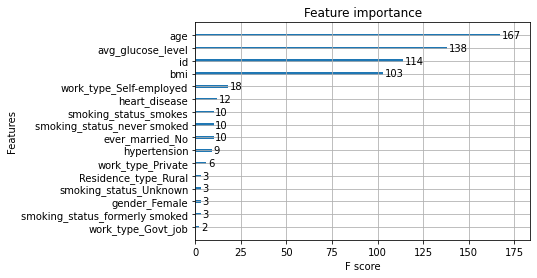

In [ ]:
#Feature Importance using Gradient Boosting algorithm
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
plt.show()

In [ ]:
#Feature Importance using Random Forest algorithm

from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['id', 'age', 'avg_glucose_level', 'bmi'], dtype='object')


#### Acoording to Gradient Boosting algorithm and Random Forest, the important featutes are : age, avg_glucose_level, id, bmi etc.

# 4.

In [ ]:
print("The roc-auc score before balancing in DecisionTree, RandomForest and GradientBoosting are\n0.5,  0.5,  0.522 respectively")
print("The roc-auc score after balancing(OverSampling) in DecisionTree, RandomForest and GradientBoosting are\n0.52, 0.79, 0.805 respectively")
print("The roc-auc score after balancing(UnderSampling) in DecisionTree, RandomForest and GradientBoosting are\n0.65, 0.82, 0.81 respectively")
print("The roc-auc score after balancing(SMOTE) in DecisionTree, RandomForest and GradientBoosting are\n0.54, 0.78, 0.80 respectively")
print("The roc-auc score after balancing(Edited Nearest Neighbours) in DecisionTree, RandomForest and GradientBoosting are\n0.56, 0.80, 0.82 respectively")


The roc-auc score before balancing in DecisionTree, RandomForest and GradientBoosting are
0.5,  0.5,  0.522 respectively
The roc-auc score after balancing(OverSampling) in DecisionTree, RandomForest and GradientBoosting are
0.52, 0.79, 0.805 respectively
The roc-auc score after balancing(UnderSampling) in DecisionTree, RandomForest and GradientBoosting are
0.65, 0.82, 0.81 respectively
The roc-auc score after balancing(SMOTE) in DecisionTree, RandomForest and GradientBoosting are
0.54, 0.78, 0.80 respectively
The roc-auc score after balancing(Edited Nearest Neighbours) in DecisionTree, RandomForest and GradientBoosting are
0.56, 0.80, 0.82 respectively


##### Data balancing techniques have significantly improved the performance of the model. 
##### If we look at the roc-auc scores before balancong the data set, it is around 0.5 which not a good score. If we look at the roc-auc scores after balancing the dataset with techniques like OverSampling, UnderSampling, SMOTE, Edited Nearest Neighbours, the scores are pretty high.
##### Coming to the Average Precision scores, some of the scores have slightly increased, and the other have slightly decreased after balancing the dataset.